In [2]:
import pymrio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
'''
Data setup --> imported from Z_analysis
Note: this will take a while to run. Something like 3 mins
'''

exio3 = pymrio.parse_exiobase3(path='/Users/jeffreyzhou/Desktop/MRIO/Data/IOT_2019_pxp.zip')
all_regions = exio3.get_regions()
all_sectors = exio3.get_sectors()

#include all missing calculations with calc_all()
exio3.calc_all()

#US Z matrix - transaction matrix
us_z = exio3.Z.aggregate('US')

#US Y matrix - final demand matrix
us_y = exio3.Y.aggregate('US')

trade_matrix_dict = {}
count = 0
lower_bound = 0
upper_bound = 200

for region in all_regions:
    trade_matrix_dict[region] = us_z.iloc[lower_bound:upper_bound]
    lower_bound += 200
    upper_bound += 200

demand_matrix_dict = {}
count = 0
lower_bound = 0
upper_bound = 200

for region in all_regions:
    demand_matrix_dict[region] = us_y.iloc[lower_bound:upper_bound]
    lower_bound += 200
    upper_bound += 200

trade_calcvalues_dict = {}
    
for region in all_regions:
    tm = trade_matrix_dict[region]
    d = {}
    for sector in all_sectors:
        d[sector] = tm[sector].values.sum()
    in_series = pd.Series(data = d, index = all_sectors)
    trade_calcvalues_dict[region] = in_series

US_total_trade = {}

for sector in all_sectors:
    in_dict = {}
    for region in all_regions:
        if region == 'US': # comment out this line if including domestic inputs
            continue
        in_dict[region] = trade_calcvalues_dict[region][sector]
    US_total_trade[sector] = in_dict

In [4]:
#function that plots graphs of specific width and height.

def plot_func(x, y, xlabel, ylabel, title):
    fig = plt.figure(figsize=(16, 5))
    ax = fig.add_subplot(111)
    ax.bar(x,y)
    fig.suptitle(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=16)

    
    plt.show()

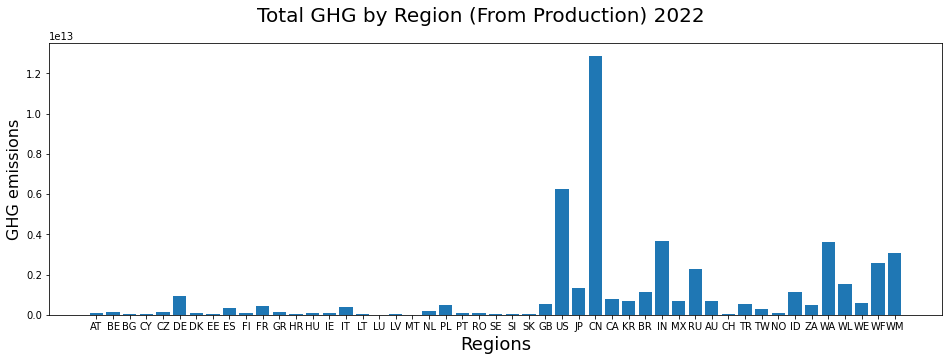

In [5]:
#Production impacts (GHG) per region
regional_prod_ghg = exio3.impacts.D_pba_reg.loc['GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)']
plot_func(all_regions, regional_prod_ghg.to_list(), 'Regions', 'GHG emissions', "Total GHG by Region (From Production) 2022")

# X Matrix: Total produciton output ($) of every region AND every sector 
All_region_total_output = exio3.x.to_dict()['indout']

# Consumption impacts
imports = exio3.impacts.D_imp.US.loc['GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)']

consumption = exio3.impacts.D_cba.US.loc['GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)']

In [6]:
print(f"2015 GHG from imports : {imports.sum()}")
print(f"2015 GHG from total consumption : {consumption.sum()}")
print(f"Ratio (all sectors combined): {imports.sum()/consumption.sum()}")

imports = imports.to_dict()
consumption = consumption.to_dict()

impacts_percent= {}
count = 0
for sector in all_sectors:
    d = consumption[sector]
    n = imports[sector]
    if d == 0:
        count += 1
        if n != 0:
            print("ERROR")
        continue
    percent = n / d
    impacts_percent[sector] = percent
count

2015 GHG from imports : 1721376874767.6313
2015 GHG from total consumption : 5939521056926.568
Ratio (all sectors combined): 0.2898174546852041


28

In [7]:
1783793254075.7356 + 5980371626369.381

7764164880445.116

In [8]:
exio3.impacts.D_cba.US.loc['GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)']

sector
Paddy rice                                           3.629765e+09
Wheat                                                9.294773e+08
Cereal grains nec                                    1.708762e+09
Vegetables, fruit, nuts                              1.845900e+10
Oil seeds                                            1.871437e+08
                                                         ...     
Membership organisation services n.e.c. (91)         3.299288e+10
Recreational, cultural and sporting services (92)    3.073611e+10
Other services (93)                                  4.547095e+10
Private households with employed persons (95)        1.487312e+09
Extra-territorial organizations and bodies           0.000000e+00
Name: GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007), Length: 200, dtype: float64

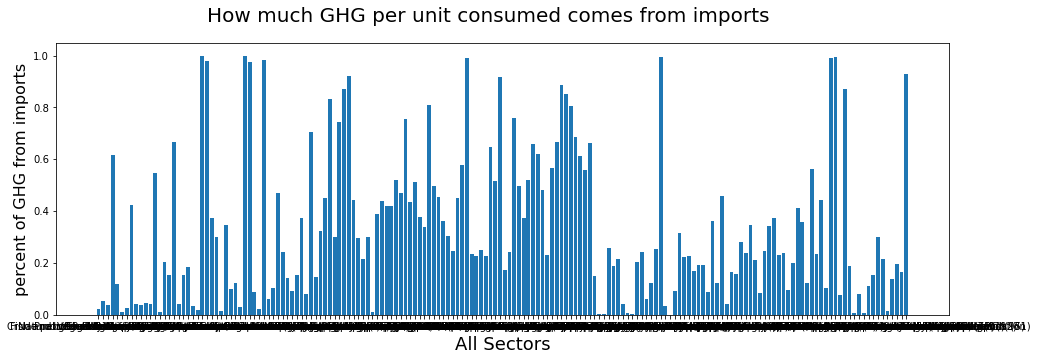

In [9]:
x, y = zip(*impacts_percent.items())
plot_func(x, y, 'All Sectors', 'percent of GHG from imports', 'How much GHG per unit consumed comes from imports')